In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('results.csv')

label_map = {
    'xgb_bin': 'XGB',
    'xgb_bin_reduced': 'XGB (Reduced)',
    'iso_forest': 'Isolation Forest',
    'iso_forest_reduced': 'Isolation Forest (Reduced)',
    'xgb_multi': 'XGB Multi',
    'mlp_binary': 'MLP',
    'mlp_multi': 'MLP Multi'
}

#seperate binary classification and multiclass classification models
df_binary = df[~df['Model'].isin(['xgb_multi', 'mlp_multi'])]
df_multi = df[df['Model'].isin(['xgb_multi', 'mlp_multi'])]

#default values
color = 'skyblue'
metrics = ['Accuracy', 'Recall', 'Precision', 'F1']

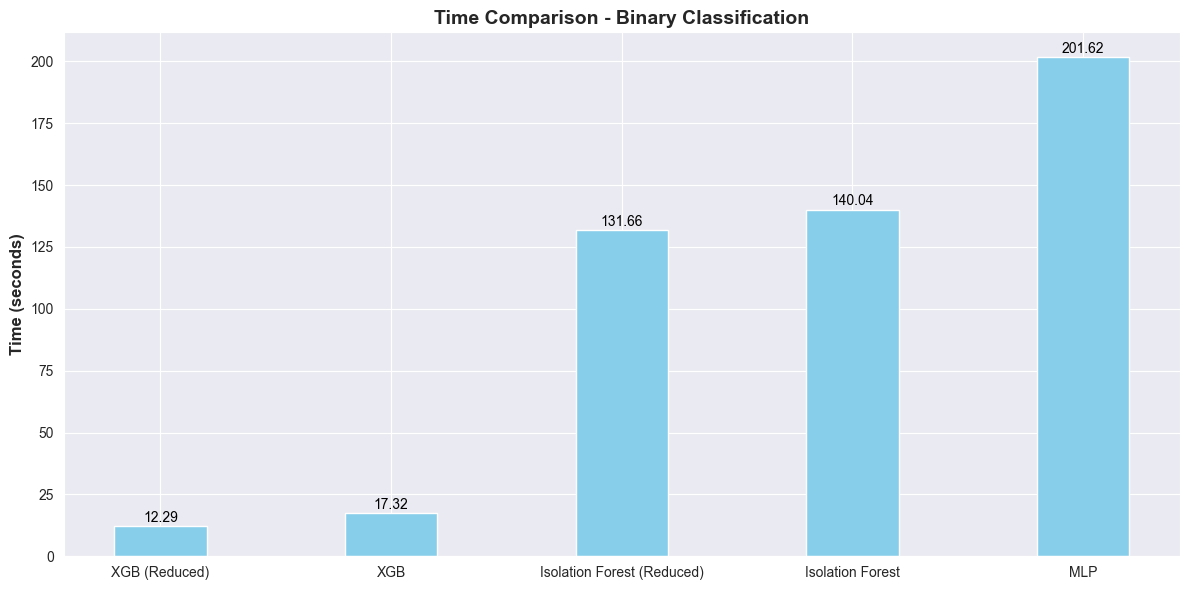

In [2]:
df_time_binary = df_binary[['Model', 'Time']]
df_sorted_binary = df_time_binary.sort_values(by='Time', ascending=True)
custom_labels_binary = df_sorted_binary['Model'].map(label_map).astype(str)

plt.figure(figsize=(12, 6))

plt.bar(custom_labels_binary, df_sorted_binary['Time'], color=color, width=0.4)

plt.ylabel('Time (seconds)', fontsize=12, weight='bold')
plt.title('Time Comparison - Binary Classification', fontsize=14, weight='bold')

plt.xticks(rotation=0, ha='center')

plt.tight_layout()


for i, v in enumerate(df_sorted_binary['Time']):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

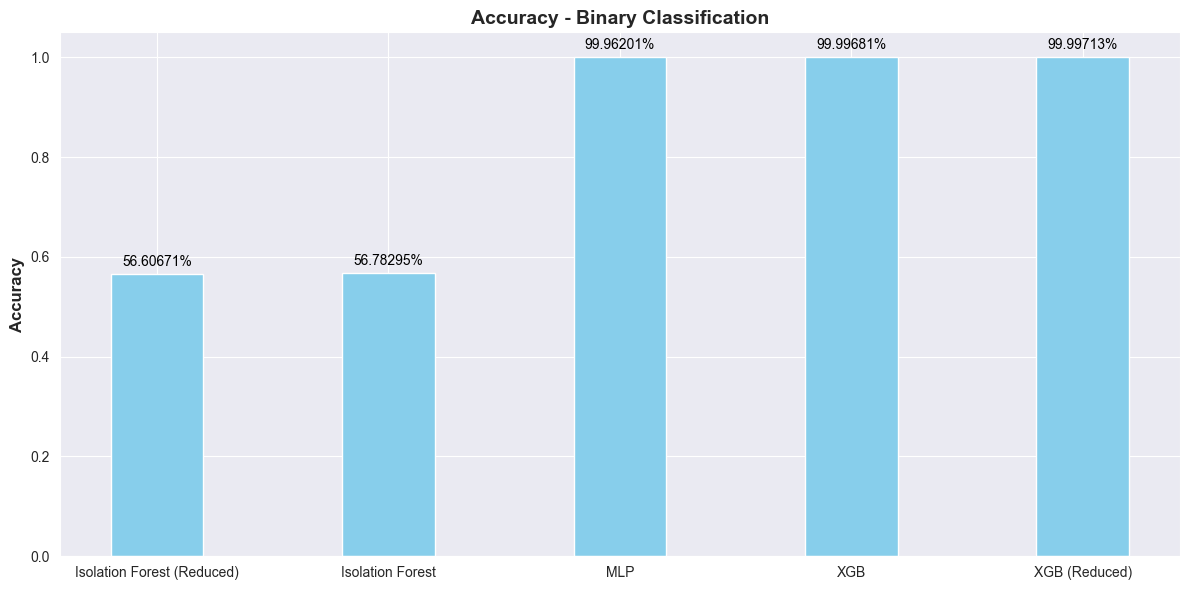

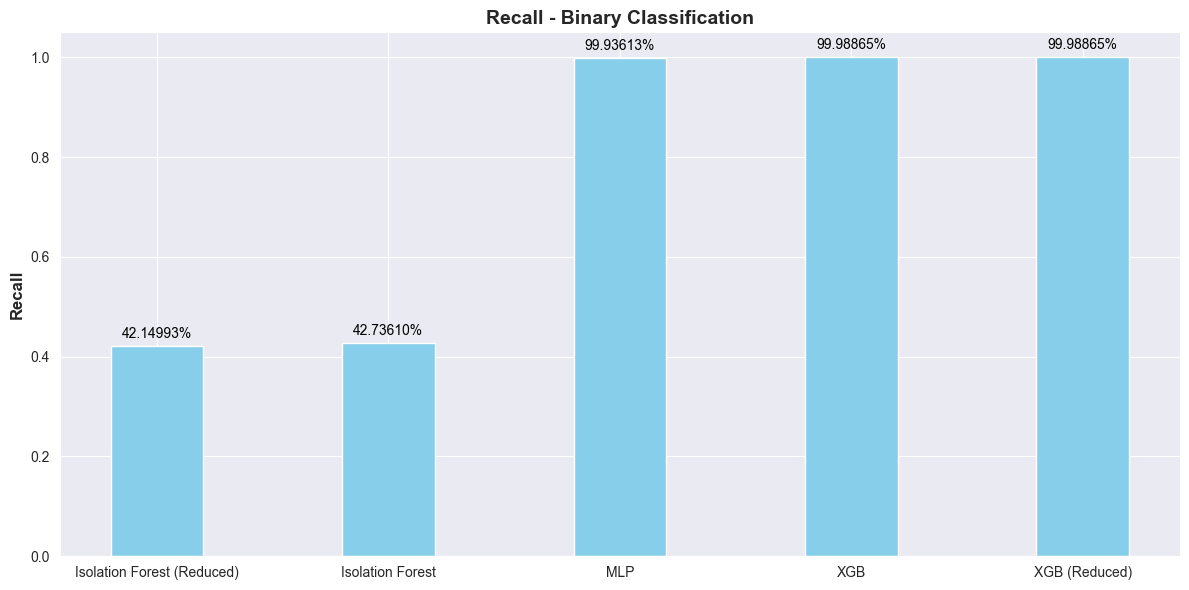

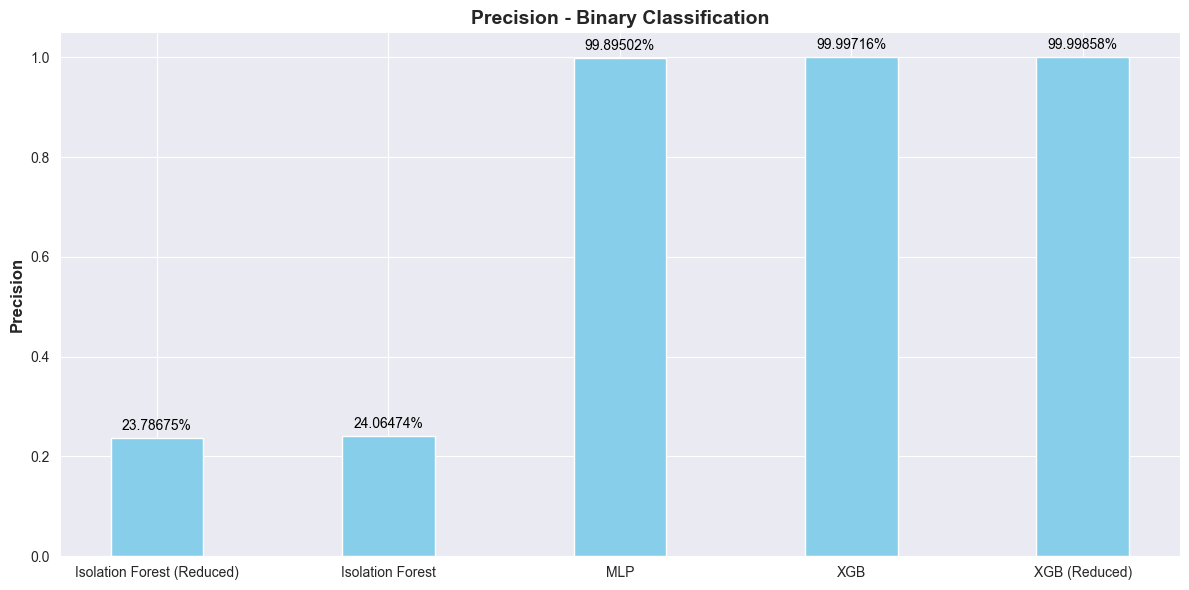

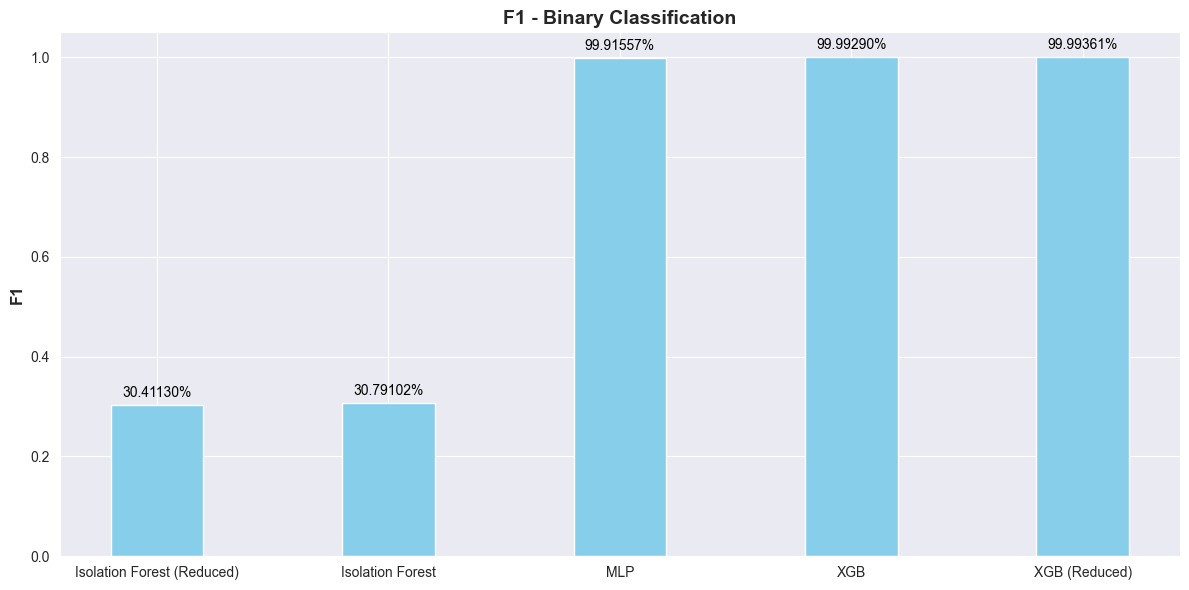

In [3]:
for metric in metrics:
    df_metric_binary = df_binary[['Model', metric]]
    df_sorted_metric_binary = df_metric_binary.sort_values(by=metric, ascending=True)
    custom_labels_metric_binary = df_sorted_metric_binary['Model'].map(label_map).astype(str)

    plt.figure(figsize=(12, 6))
    plt.bar(custom_labels_metric_binary, df_sorted_metric_binary[metric], color=color, width=0.4)

    plt.ylabel(metric, fontsize=12, weight='bold')
    plt.title(f'{metric} - Binary Classification', fontsize=14, weight='bold')
    plt.ylim(0, 1.05)
    plt.xticks(rotation=0, ha='center')
    plt.tight_layout()


    for i, v in enumerate(df_sorted_metric_binary[metric]):
        plt.text(i, v + 0.01, f'{v*100:.5f}%', ha='center', va='bottom', fontsize=10, color='black')

    plt.show()



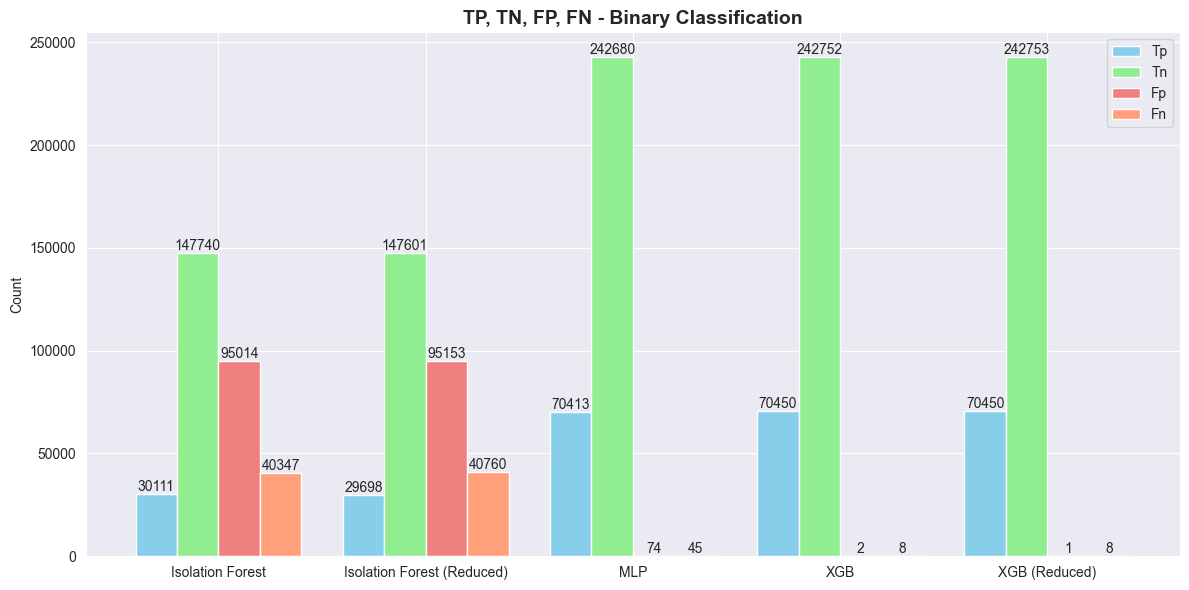

In [4]:
# Sorting the dataframe by Model
df_binary_sorted = df_binary.sort_values(by='Model')

# Components for TP, TN, FP, FN
components = ['Tp', 'Tn', 'Fp', 'Fn']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Map model names using label_map
custom_labels = df_binary_sorted['Model'].map(label_map)

# Bar plot for TP, TN, FP, FN with model labels
plt.figure(figsize=(12, 6))
x = np.arange(len(df_binary_sorted))
width = 0.2

for i, comp in enumerate(components):
    bars = plt.bar(x + i * width, df_binary_sorted[comp], width, label=comp, color=colors[i % len(colors)])
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.0f}', ha='center', va='bottom')

plt.ylabel('Count')
plt.title('TP, TN, FP, FN - Binary Classification', fontsize=14, weight='bold')
plt.xticks(x + width * (len(components) - 1) / 2, custom_labels)
plt.legend()
plt.tight_layout()
plt.show()

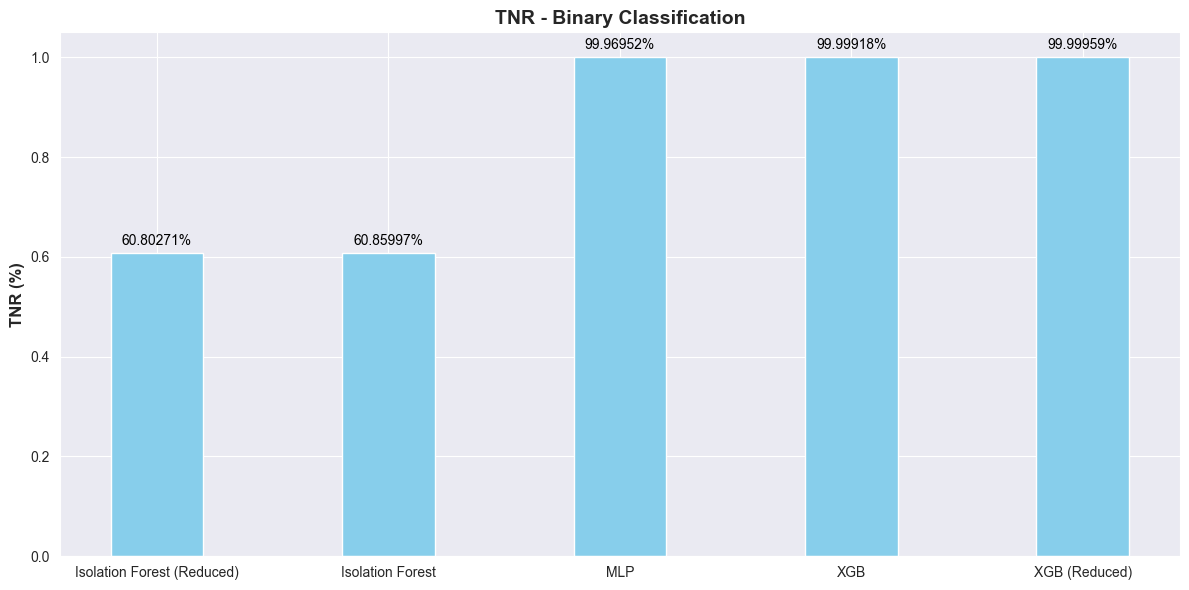

In [5]:
df_binary = df_binary.copy()

df_binary['TNR'] = df_binary['Tn'] / (df_binary['Tn'] + df_binary['Fp'])

df_tnr_binary = df_binary[['Model', 'TNR']].copy()
df_sorted_tnr_binary = df_tnr_binary.sort_values(by='TNR', ascending=True)
custom_labels_tnr_binary = df_sorted_tnr_binary['Model'].map(label_map).astype(str)

plt.figure(figsize=(12, 6))
plt.bar(custom_labels_tnr_binary, df_sorted_tnr_binary['TNR'], color=color, width=0.4)

plt.ylabel('TNR (%)', fontsize=12, weight='bold')
plt.title('TNR - Binary Classification', fontsize=14, weight='bold')
plt.ylim(0, 1.05)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

for i, v in enumerate(df_sorted_tnr_binary['TNR']):
    plt.text(i, v + 0.01, f'{v*100:.5f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

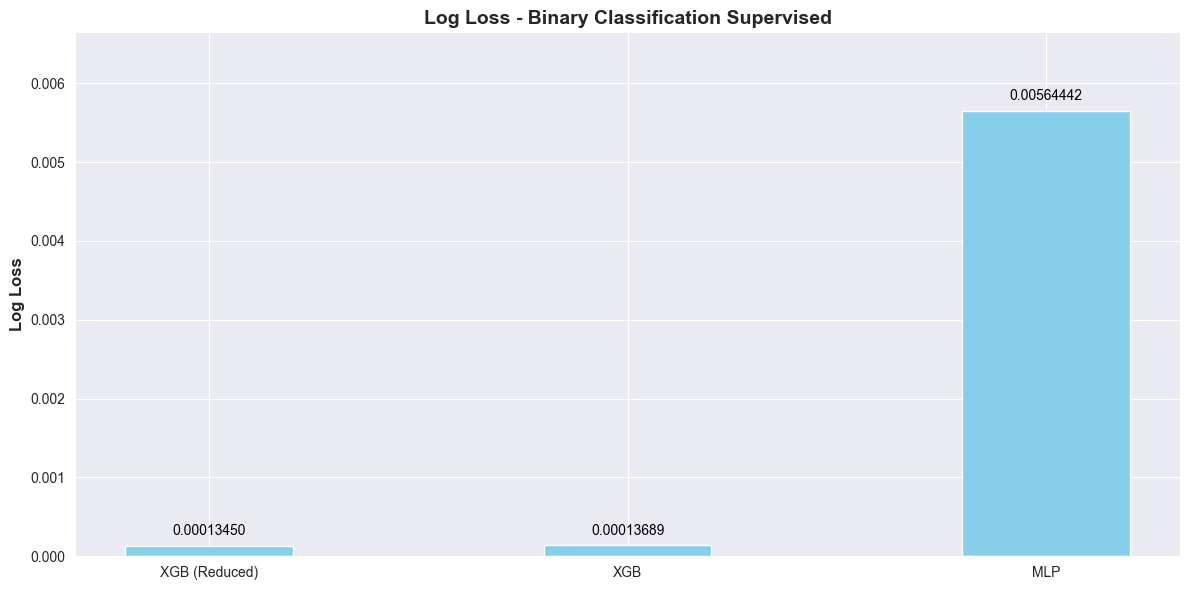

In [6]:
df_log_loss = df[['Model', 'Log_loss']]
df_sorted_log_loss = df_log_loss.sort_values(by='Log_loss', ascending=True)
custom_labels_log_loss = df_sorted_log_loss['Model'].map(label_map).astype(str)

plt.figure(figsize=(12, 6))
plt.bar(custom_labels_log_loss, df_sorted_log_loss['Log_loss'], color=color, width=0.4)
plt.ylabel('Log Loss', fontsize=12, weight='bold')
plt.title('Log Loss - Binary Classification Supervised', fontsize=14, weight='bold')
plt.ylim(0, df_sorted_log_loss['Log_loss'].max() + 0.001)
plt.tight_layout()

for i, v in enumerate(df_sorted_log_loss['Log_loss']):
    plt.text(i, v + 0.0001, f'{v:.8f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

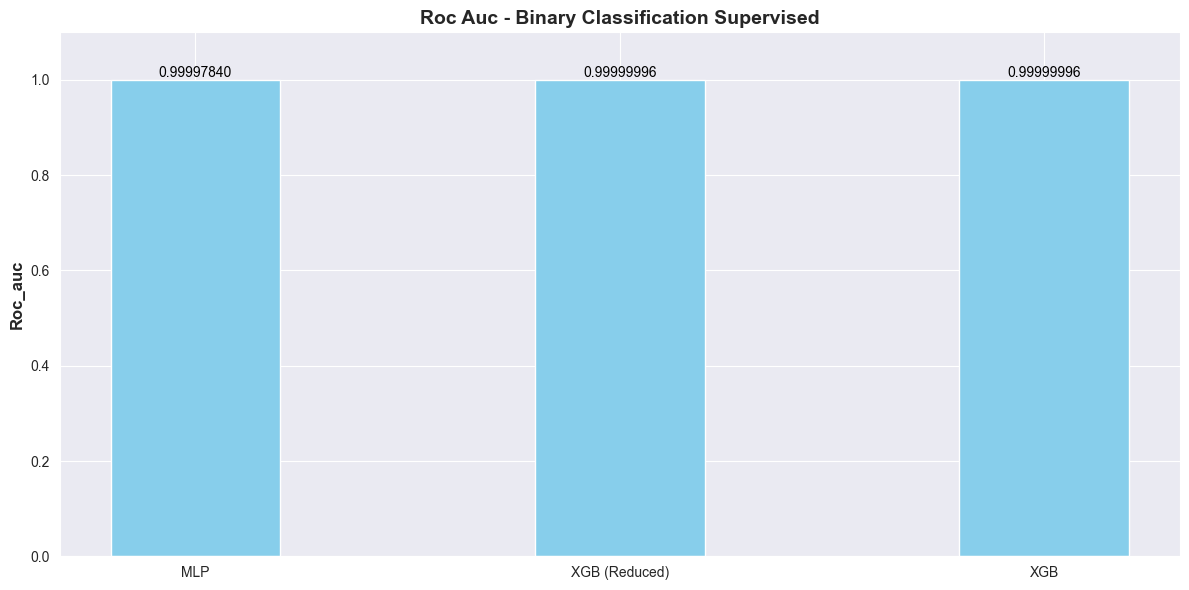

In [7]:
df_roc_auc = df[['Model', 'Roc_auc']]
df_sorted_roc_auc = df_roc_auc.sort_values(by='Roc_auc', ascending=True)
custom_labels_roc_auc = df_sorted_roc_auc['Model'].map(label_map).astype(str)

plt.figure(figsize=(12, 6))
plt.bar(custom_labels_roc_auc, df_sorted_roc_auc['Roc_auc'], color=color, width=0.4)
plt.ylabel('Roc_auc', fontsize=12, weight='bold')
plt.title('Roc Auc - Binary Classification Supervised', fontsize=14, weight='bold')
plt.ylim(0, df_sorted_roc_auc['Roc_auc'].max() + 0.1)
plt.tight_layout()

for i, v in enumerate(df_sorted_roc_auc['Roc_auc']):
    plt.text(i, v + 0.0001, f'{v:.8f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

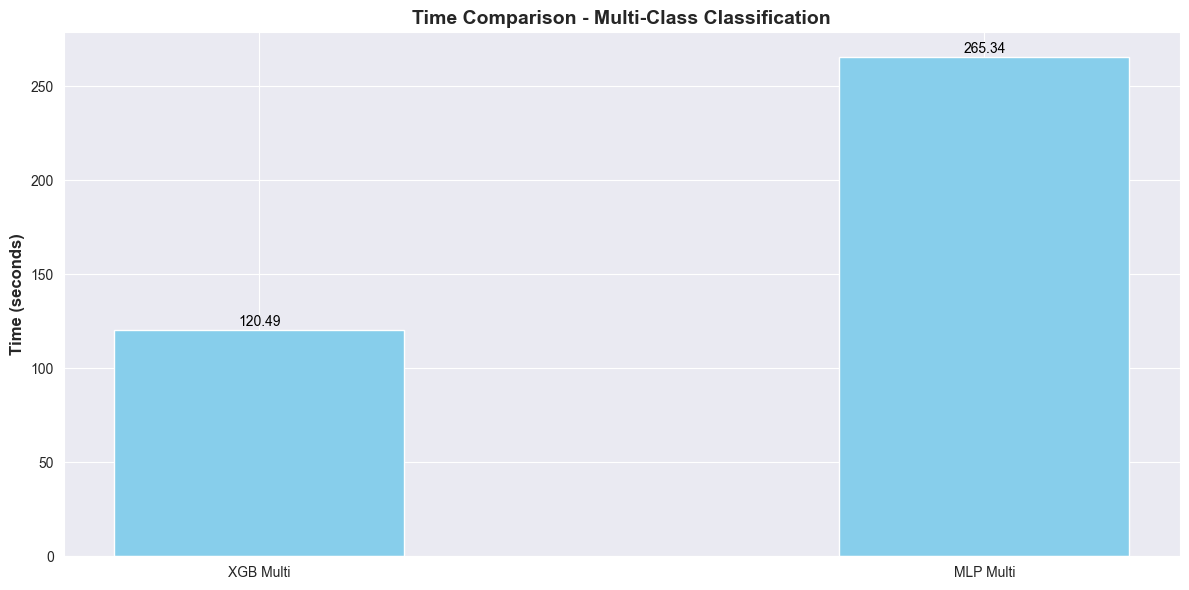

In [8]:
df_time_multi = df_multi[['Model', 'Time']]
df_sorted_multi = df_time_multi.sort_values(by='Time', ascending=True)
custom_labels_multi = df_sorted_multi['Model'].map(label_map).astype(str)

plt.figure(figsize=(12, 6))
plt.bar(custom_labels_multi, df_sorted_multi['Time'], color=color, width=0.4)

plt.ylabel('Time (seconds)', fontsize=12, weight='bold')
plt.title('Time Comparison - Multi-Class Classification', fontsize=14, weight='bold')

plt.xticks(rotation=0, ha='center')
plt.tight_layout()

# Add value labels on top of each bar (rounded to 2 decimals)
for i, v in enumerate(df_sorted_multi['Time']):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()


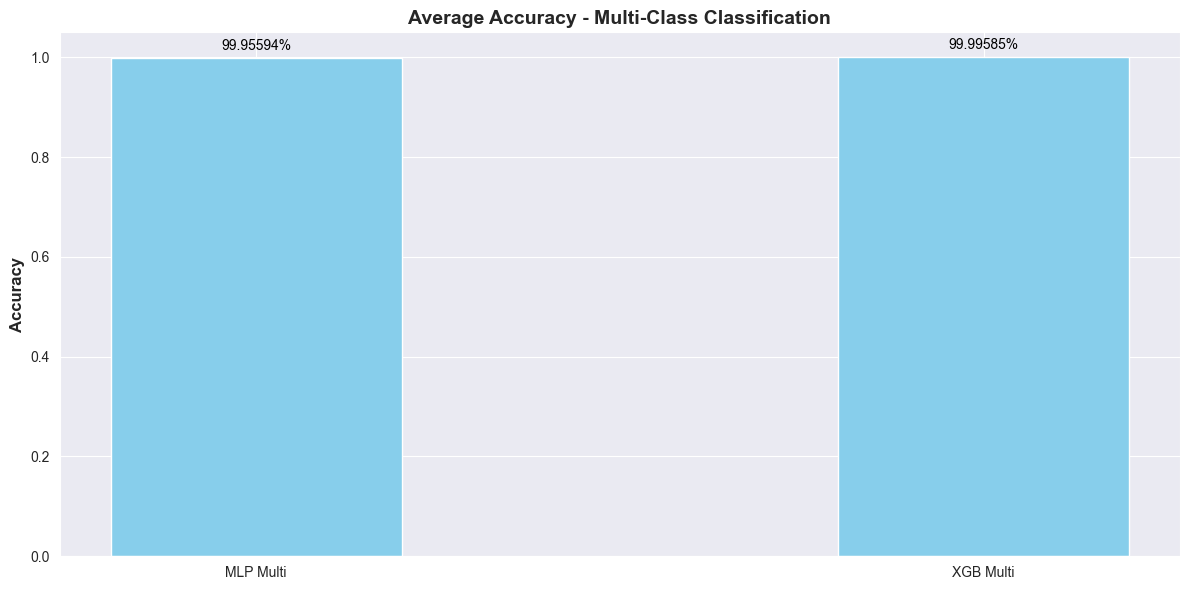

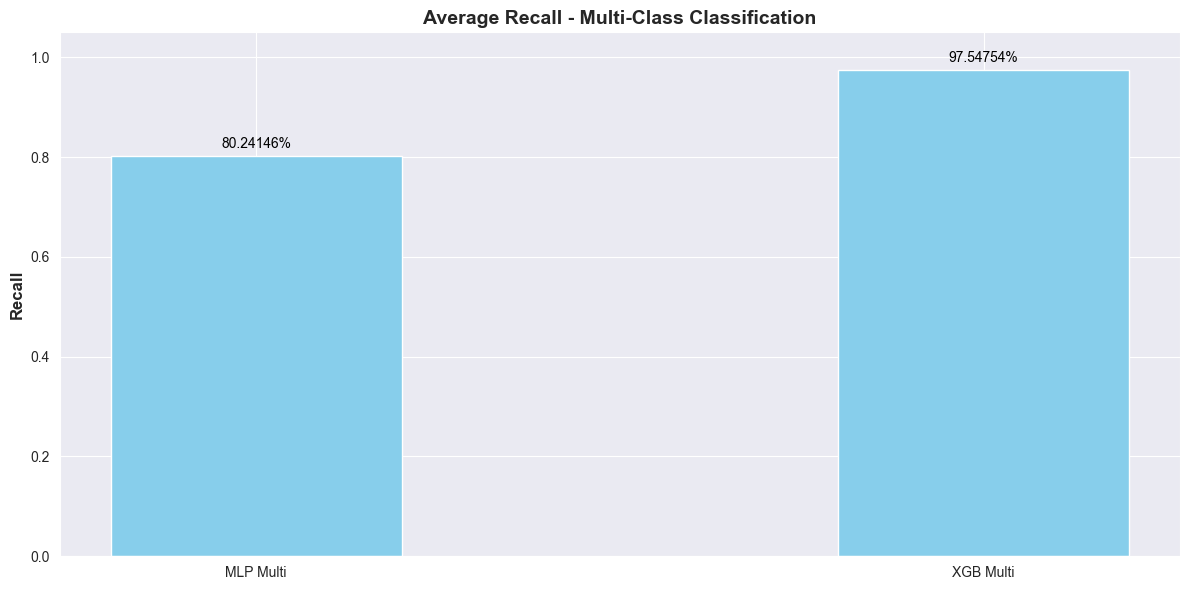

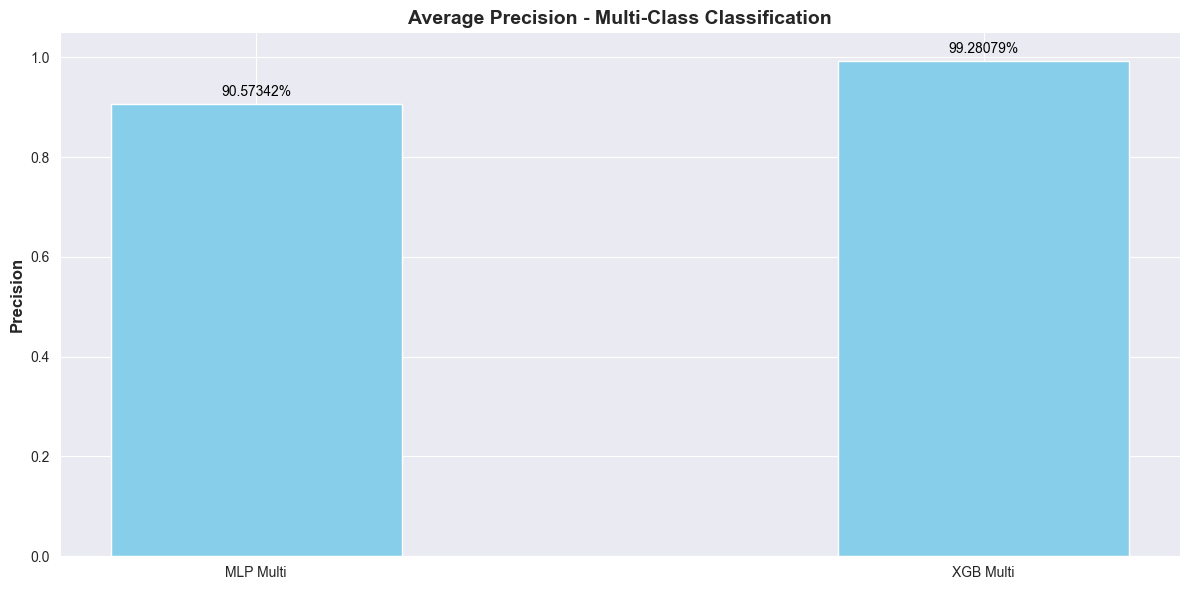

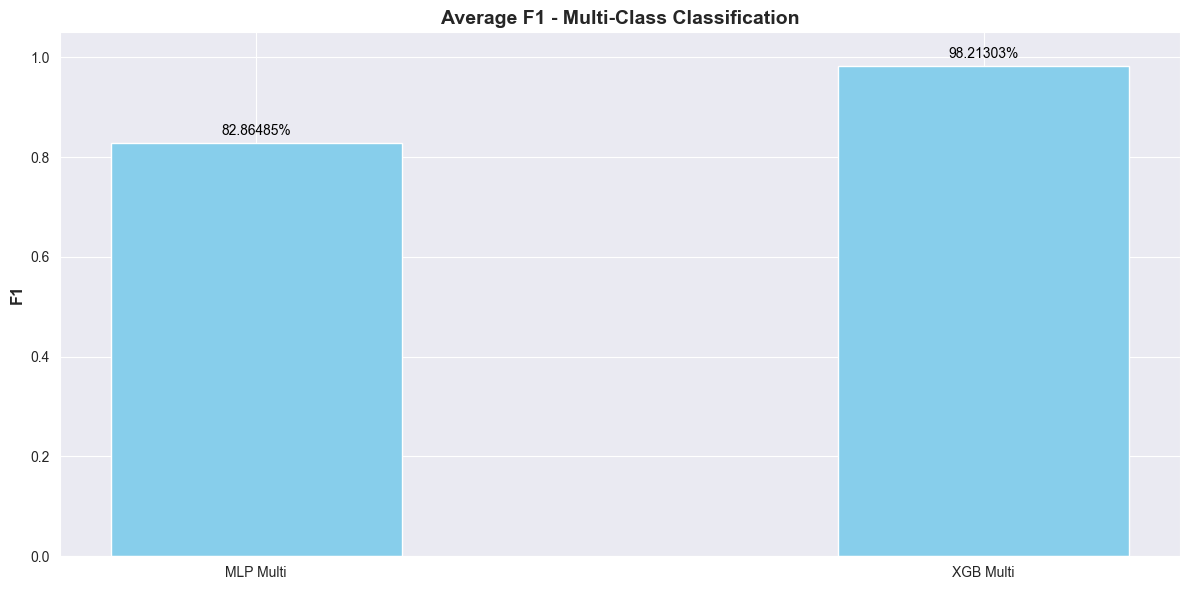

In [9]:
for metric in metrics:
    df_metric_multi = df_multi[['Model', metric]]
    df_sorted_metric_multi = df_metric_multi.sort_values(by=metric, ascending=True)
    custom_labels_metric_multi = df_sorted_metric_multi['Model'].map(label_map).astype(str)

    plt.figure(figsize=(12, 6))
    plt.bar(custom_labels_metric_multi, df_sorted_metric_multi[metric], color=color, width=0.4)

    plt.ylabel(metric, fontsize=12, weight='bold')
    plt.title(f'Average {metric} - Multi-Class Classification', fontsize=14, weight='bold')
    plt.ylim(0, 1.05)
    plt.xticks(rotation=0, ha='center')
    plt.tight_layout()


    for i, v in enumerate(df_sorted_metric_multi[metric]):
        plt.text(i, v + 0.01, f'{v*100:.5f}%', ha='center', va='bottom', fontsize=10, color='black')

    plt.show()